<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220601/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1(Regression)_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

## 1. 데이터 및 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## california 데이터 불러오기

from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']
data = pd.concat([X, y], axis=1)

In [3]:
display(X)
display(y)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 2. Data Preprocessing

    1. 결측치 확인
    2. feature selection

In [4]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 3. EDA
    - feature distribution
    - target distribution

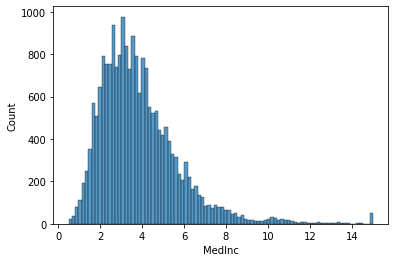

In [5]:
# 모든 feature가 수치값이기 때문에 데이터의 분포를 살펴보도록 하자.

sns.histplot(data=data, x='MedInc')

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_X = data.drop(columns=['MedHouseVal', 'Longitude', 'AveRooms', 'Latitude'])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    data_X.values, i) for i in range(data_X.shape[1])]
vif["features"] = data_X.columns
vif

## 일반적으로 vif value가 10이상인 column은 다중공선성이 높다고 판단되므로 가장 높은 column부터 조금씩 줄여 나간다.

,VIF Factor,features
0,3.801038,MedInc
1,3.769898,HouseAge
2,4.263506,AveBedrms
3,2.222516,Population
4,1.094644,AveOccup


In [13]:
data_X = data.drop(columns=['Longitude', 'AveRooms', 'Latitude'])
data_X

,MedInc,HouseAge,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


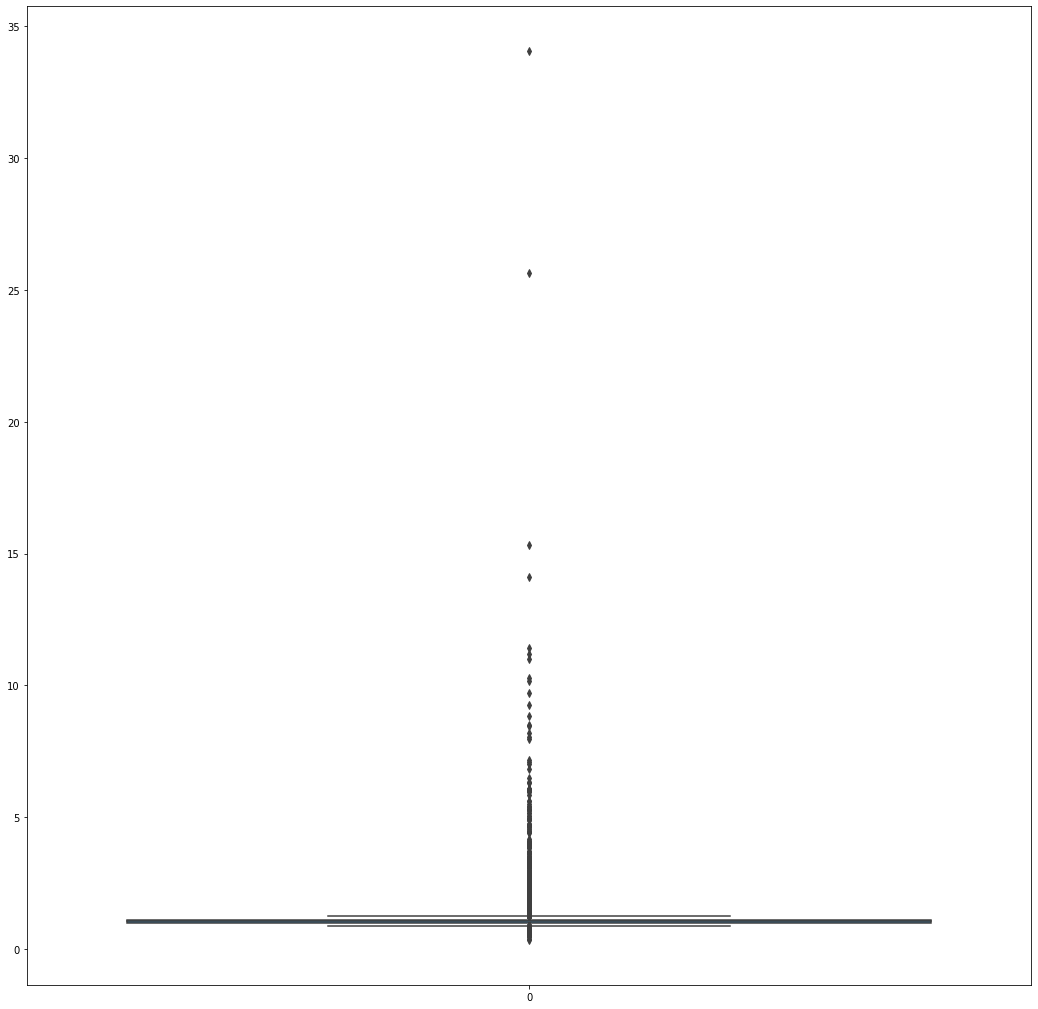

In [20]:
## outlier가 있는지 확인하고 제거.
plt.figure(figsize=(18, 18))
sns.boxplot(data = data_X['AveBedrms'])
plt.show()

## 10이상인 값 제거.

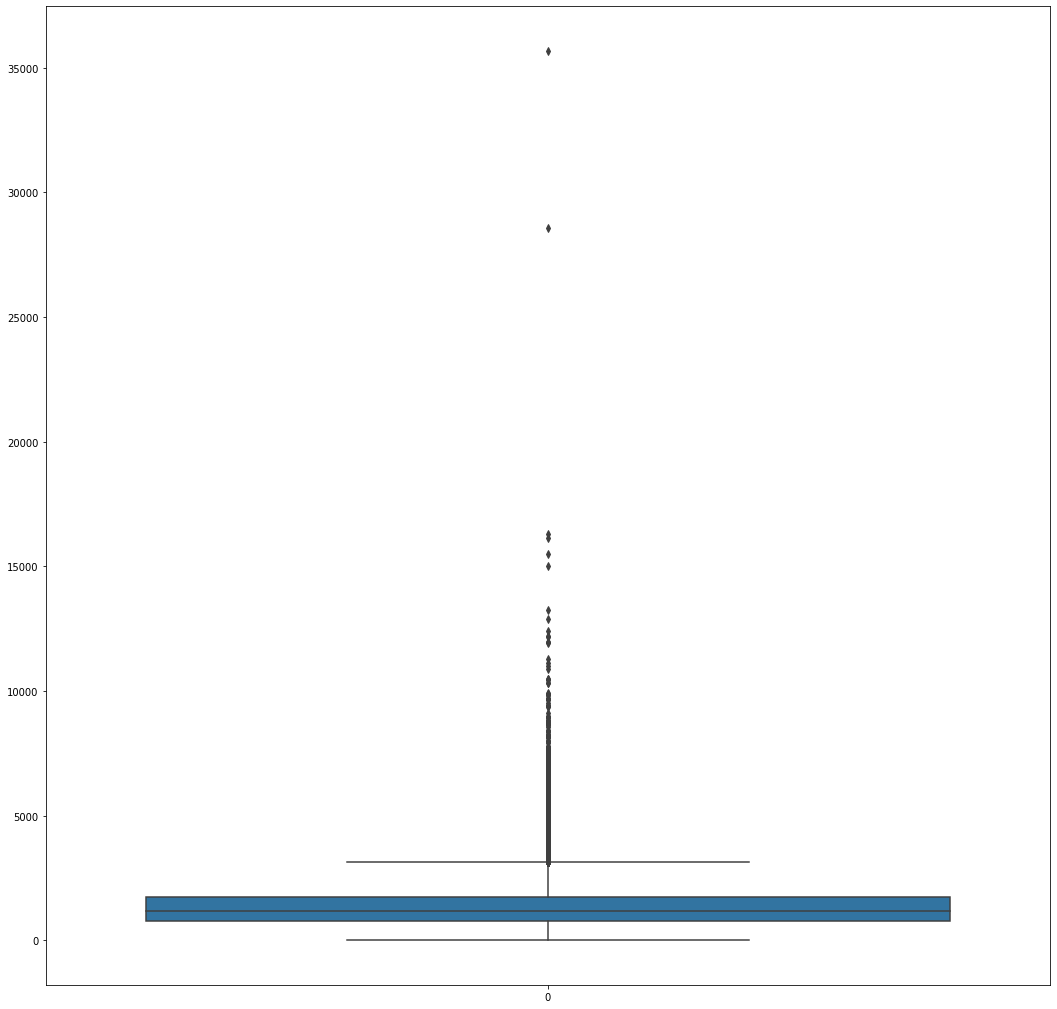

In [21]:
plt.figure(figsize=(18, 18))
sns.boxplot(data = data_X['Population'])
plt.show()

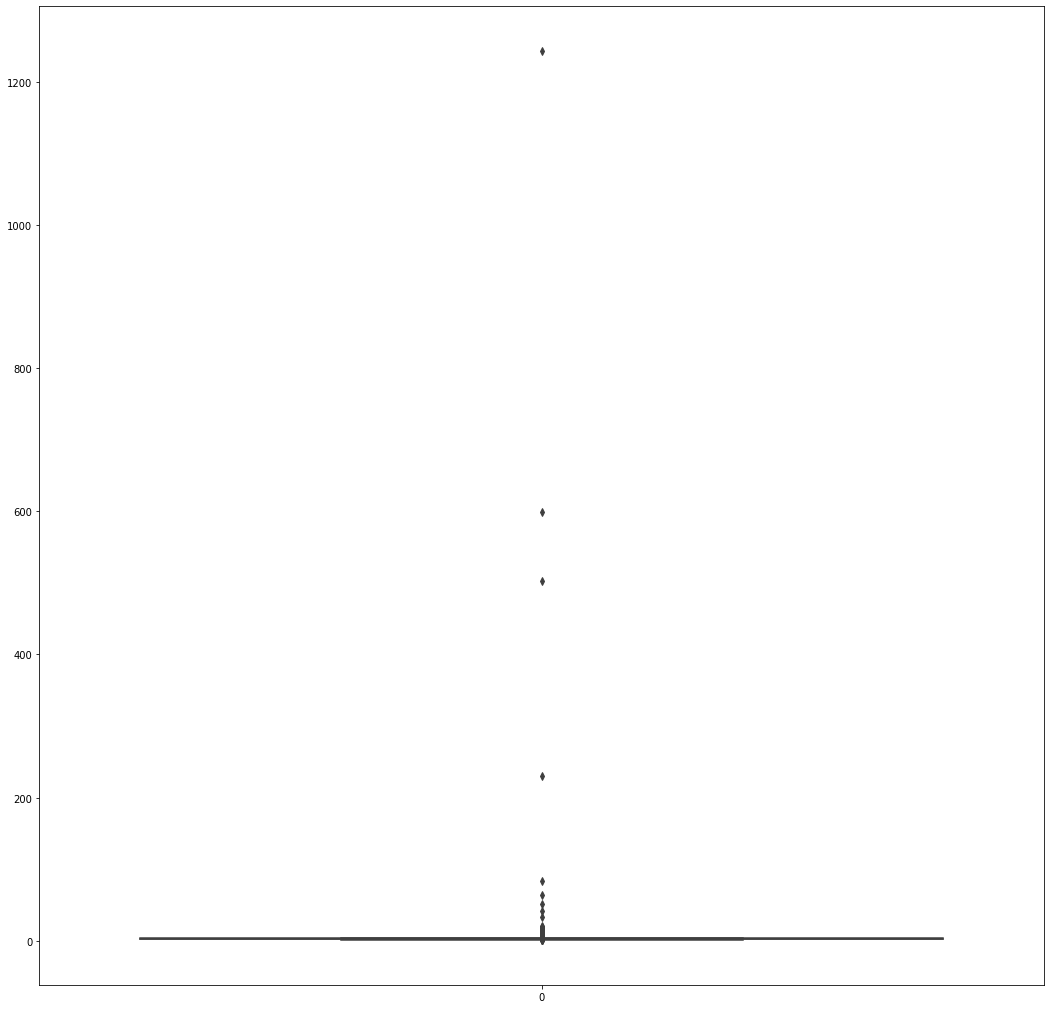

In [23]:
plt.figure(figsize=(18, 18))
sns.boxplot(data = data_X['AveOccup'])
plt.show()

In [29]:
data_X = data_X[(data_X['AveBedrms'] < 10) & (data_X['Population'] < 10000) & (data_X['AveOccup'] < 200)]

In [30]:
len(data_X)

20604

In [31]:
data_X.head(2)

,MedInc,HouseAge,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,1.02381,322.0,2.555556,4.526
1,8.3014,21.0,0.97188,2401.0,2.109842,3.585


## 4. Training
    - train-test split
    - Standardization
    - Model training
    - Hyper-parameter tunning
    - Evaluation

In [32]:
X = data_X.drop(columns='MedHouseVal')
y = data_X['MedHouseVal']
display(X, y)

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20604, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16483, 5) (4121, 5) (16483,) (4121,)


In [34]:
## validation data

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.25, random_state=0xC0FFEE)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(12362, 5) (4121, 5) (12362,) (4121,)


In [35]:
## feature engineering(StandardScaler) - 평균0 분산1 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train

array([[-0.35507926, -0.2159678 , -0.03552741,  1.33266013, -0.9381389 ],
       [-0.30717237, -0.93292623, -0.09601231,  1.47027801, -0.2400437 ],
       [-0.60047877, -0.93292623,  0.05745411,  0.01955618, -0.33756859],
       ...,
       [-0.9574188 ,  0.50099064, -0.21779518, -0.74403192, -0.27061425],
       [ 0.43457983, -1.17191237, -0.31231948, -0.5471619 , -0.10503146],
       [-0.78769451, -0.2159678 , -0.25910967, -0.08174587, -0.45912624]])

In [36]:
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [37]:
## 모델 학습 (XGBRegressor, LGBMRegressor)

from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_squared_error

In [39]:
reg_1 = XGBRegressor()
reg_2 = LGBMRegressor()

reg_1.fit(X_train, y_train)
reg_2.fit(X_train, y_train)

pred_train_1 = reg_1.predict(X_train)
pred_train_2 = reg_2.predict(X_train)

pred_val_1 = reg_1.predict(X_val)
pred_val_2 = reg_2.predict(X_val)

mse_train_1 = mean_squared_error(y_train, pred_train_1)
mse_val_1 = mean_squared_error(y_val, pred_val_1)
mse_train_2 = mean_squared_error(y_train, pred_train_2)
mse_val_2 = mean_squared_error(y_val, pred_val_2)

print("1. XGBoost,\t\t train/val = %.4f, %.4f" % (mse_train_1, mse_val_1))
print("2. LightGBM,\t\t train/val = %.4f, %.4f" % (mse_train_2, mse_val_2))


[08:12:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. XGBoost,		 train/val = 0.4164, 0.4348
2. LightGBM,		 train/val = 0.3368, 0.4351


In [40]:
## Hyper-parameter tuning
# 1. Grid Search (GridSearchCV): 주어진 hp의 조합을 모두 돌려보는 방식
# 2. Bayesian Optimization (hyperopt, optuna, .. ) : hyper-parameter를 최적화하는 베이지안 방식

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3, 5, -1],
    'learning_rate' : [0.1, 0.01],
    'n_estimators': [50, 100],
}

gcv = GridSearchCV(reg_2, param_grid, scoring='neg_mean_squared_error', verbose=1)
gcv.fit(X_train, y_train)
print(gcv.best_estimator_)
print(gcv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LGBMRegressor(n_estimators=50)
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 50}


## 5. Test(Prediction)

In [42]:
final_model = gcv.best_estimator_

In [43]:
result = reg_2.predict(X_test)

In [44]:
mean_squared_error(y_test, result)

0.4376152689569965